In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pImpactR as impact

In [2]:
Emit = ['0.16','0.04']
tuneX = 0.68070055 - 0.001*np.sqrt(3.0)
tuneY = 0.78592217 - 0.001*np.sqrt(3.0)
maxTurn = 0.4

In [3]:
beam, lattice = impact.readInputFile('test.original.in');
ke = beam.kinetic_energy
mass = beam.mass
freq = beam.frequency
pDataInit = impact.readParticleData(-111110,ke,mass,freq);

reading ImpactZ input file (test.original.in)
  : mpi task info .............................done
  : simulation control parameters .............done
  : space charge field solver, mesh info ......done
  : dist-type,restart,subcycle,#of state ......done
  : Multiple Charge State info ................done
  : particle distribution info ................done
  : beam reference orbit info .................done
  : converting impact dist to twiss param......done
  : lattice info ..............................done


In [4]:
nMax=[]
for emit in Emit:
    nMax.append(int(maxTurn/np.sqrt(float(emit)*1.0e-6)))

Y=[]
X=[]
N=[]
i=0
for emit in Emit:
    X.append(np.load('Xc.mid.'+emit+'mm-mrad.'+str(8)+'mm.npy')[:nMax[i]])
    Y.append(np.load('Yc.mid.'+emit+'mm-mrad.'+str(8)+'mm.npy')[:nMax[i]])
    N.append(np.arange(len(Y[i]))*np.sqrt(float(emit)*1.0e-6))
    
    i=i+1

for i in range(len(Emit)):
    X[i]=X[i]*np.exp(-1j*np.angle(X[i][0]))
    Y[i]=Y[i]*np.exp(-1j*np.angle(Y[i][0]))

#hilbert = np.loadtxt('chad_data.hilbert')

In [5]:
fftX = []
fftY = []
Tune = []
for i in range(len(Emit)):
    fftX.append(np.fft.fft(X[i]))
    fftY.append(np.fft.fft(Y[i]))
    Tune.append(np.linspace(0,1,nMax[i]))

# Raw Data

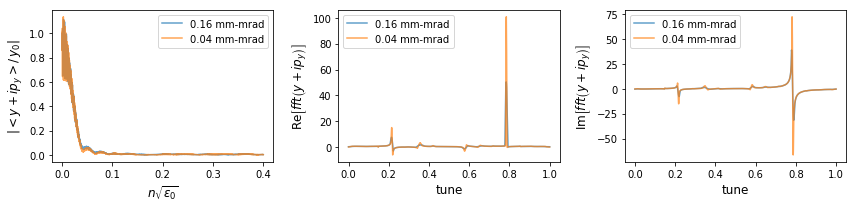

In [6]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
for i in range(len(Emit)):
    plt.plot(N[i][:nMax[i]],np.abs(Y[i][:nMax[i]])/np.abs(Y[i][0]),alpha=0.7)
plt.xlabel(r'$n\sqrt{\epsilon_0}$',fontsize=12);
plt.ylabel(r'$|< y+i p_y > /\,y_0|$',fontsize=12);
legend = [emit + ' mm-mrad' for emit in Emit]
plt.legend(legend)

plt.subplot(1,3,2)
for i in range(len(Emit)):
    plt.plot(Tune[i],np.real(fftY[i]),alpha=0.7)
plt.xlabel('tune',fontsize=12);
plt.ylabel(r'Re$\left[fft\left(y+ip_y \right)\right]$',fontsize=12);
plt.legend(legend)

plt.subplot(1,3,3)
for i in range(len(Emit)):
    plt.plot(Tune[i],np.imag(fftY[i]),alpha=0.7)
plt.xlabel('tune',fontsize=12);
plt.ylabel(r'Im$\left[fft\left(y+ip_y \right)\right]$',fontsize=12);
plt.legend(legend)

plt.tight_layout()
plt.savefig('Centroid.fft.y.png',dpi=180,bbox_inches = "tight")

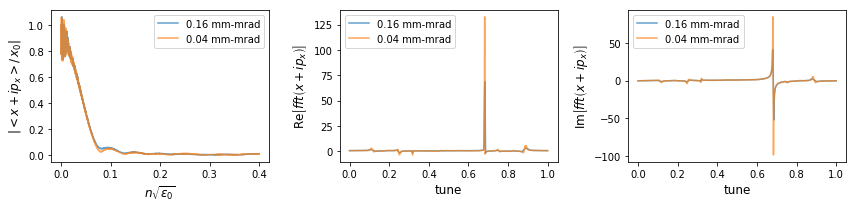

In [12]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
for i in range(len(Emit)):
    plt.plot(N[i][:nMax[i]],np.abs(X[i][:nMax[i]])/np.abs(X[i][0]),alpha=0.7)
plt.xlabel(r'$n\sqrt{\epsilon_0}$',fontsize=12);
plt.ylabel(r'$|< x+i p_x > /\,x_0|$',fontsize=12);
legend = [emit + ' mm-mrad' for emit in Emit]
plt.legend(legend)

plt.subplot(1,3,2)
for i in range(len(Emit)):
    plt.plot(Tune[i],np.real(fftX[i]),alpha=0.7)
plt.xlabel('tune',fontsize=12);
plt.ylabel(r'Re$\left[fft\left(x+ip_x \right)\right]$',fontsize=12);
plt.legend(legend)

plt.subplot(1,3,3)
for i in range(len(Emit)):
    plt.plot(Tune[i],np.imag(fftX[i]),alpha=0.7)
plt.xlabel('tune',fontsize=12);
plt.ylabel(r'Im$\left[fft\left(x+ip_x \right)\right]$',fontsize=12);
plt.legend(legend)

plt.tight_layout()
plt.savefig('Centroid.fft.x.png',dpi=180,bbox_inches = "tight")

# fft zoom
### near betatron tune at y=y0

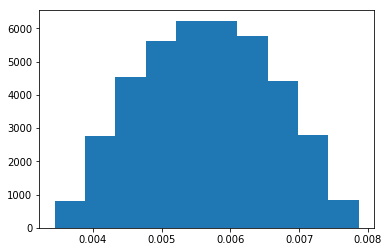

In [7]:
plt.hist(pDataInit[:,2]);

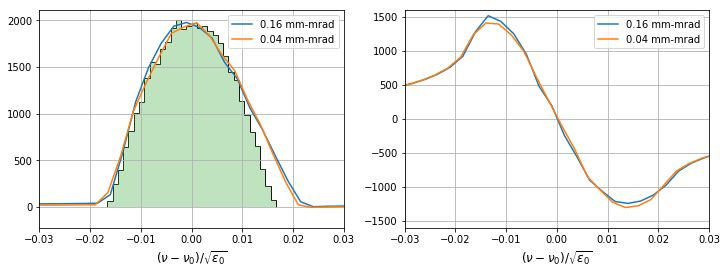

In [8]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
for i in range(len(Emit)):
    plt.plot((Tune[i]-tuneY)/np.sqrt(float(Emit[i])),np.real(fftY[i])*np.sqrt(float(Emit[i]))*9.8e1)
plt.hist((pDataInit[:,2]-0.008/np.sqrt(2.0))*2.5*3,bins=32,alpha=0.9,histtype ='step',color='k');
plt.hist((pDataInit[:,2]-0.008/np.sqrt(2.0))*2.5*3,bins=32,alpha=0.3,histtype ='bar');
plt.xlim(-0.03,0.03)
plt.xlabel(r'$(\nu-\nu_0)/\sqrt{\epsilon_0}$',fontsize=12);
plt.legend(legend)
plt.grid()
plt.subplot(1,2,2)
for i in range(len(Emit)):
    plt.plot((Tune[i]-tuneY)/np.sqrt(float(Emit[i])),np.imag(fftY[i])*np.sqrt(float(Emit[i]))*9.8e1)
plt.xlim(-0.03,0.03)
plt.ylim(-1600,1600)
plt.xlabel(r'$(\nu-\nu_0)/\sqrt{\epsilon_0}$',fontsize=12);
plt.legend(legend)
plt.grid()
plt.savefig('fft.vy.png',dpi=180,bbox_inches = "tight")

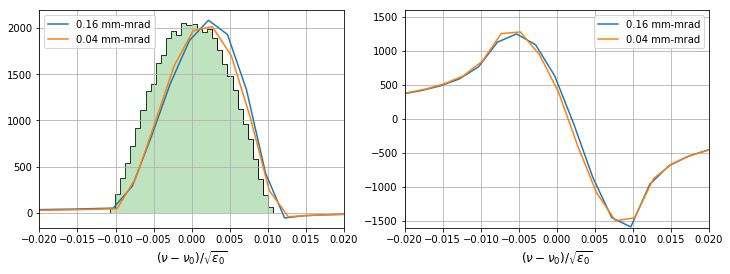

In [11]:
plt.figure(figsize=(12,4))
tuneX = 0.68080055 + 0.001
plt.subplot(1,2,1)
for i in range(len(Emit)):
    plt.plot((Tune[i]-tuneX)/np.sqrt(float(Emit[i])),np.real(fftX[i])*np.sqrt(float(Emit[i]))*7.6e1)
plt.hist((pDataInit[:,0]-0.008/np.sqrt(2.0))*2.5*7.7,bins=32,alpha=0.9,histtype ='step',color='k');
plt.hist((pDataInit[:,0]-0.008/np.sqrt(2.0))*2.5*7.7,bins=32,alpha=0.3,histtype ='bar');
plt.xlim(-0.02,0.02)
plt.xlabel(r'$(\nu-\nu_0)/\sqrt{\epsilon_0}$',fontsize=12);
plt.legend(legend)
plt.grid()
plt.subplot(1,2,2)
for i in range(len(Emit)):
    plt.plot((Tune[i]-tuneX)/np.sqrt(float(Emit[i])),np.imag(fftX[i])*np.sqrt(float(Emit[i]))*7.6e1)
plt.xlim(-0.02,0.02)
plt.ylim(-1600,1600)
plt.xlabel(r'$(\nu-\nu_0)/\sqrt{\epsilon_0}$',fontsize=12);
plt.legend(legend)
plt.grid()
plt.savefig('fft.vx.png',dpi=180,bbox_inches = "tight")